In [14]:
pip install pytrends


Note: you may need to restart the kernel to use updated packages.


In [15]:

from pytrends.request import TrendReq

#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US')     
                
#extract data about weekly searches of certain keywords
keywords = ["Python", "R", "C++", "Java", "HTML"]
pytrends.build_payload(keywords, timeframe='today 5-y')



In [17]:
#store kewords data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)

data


,Python,R,C++,Java,HTML
date,,,,,
2016-07-17,14,58,79,34,15
2016-07-24,14,61,79,33,15
2016-07-31,14,58,76,33,15
2016-08-07,13,57,74,33,14
2016-08-14,12,57,72,30,13
...,...,...,...,...,...
2021-06-13,23,46,84,20,10
2021-06-20,23,47,85,19,10
2021-06-27,21,45,85,19,10


In [ ]:
type(data)

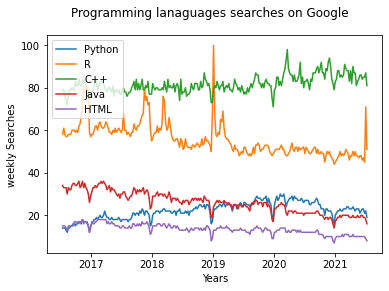

In [19]:
#Plot data 
import matplotlib.pyplot as plt 

plt.plot(data)

#add tittles 
plt.suptitle('Programming lanaguages searches on Google')
plt.xlabel('Years')
plt.ylabel('weekly Searches')

#add legend
plt.legend(keywords, loc='upper left')
plt.savefig('data.png')


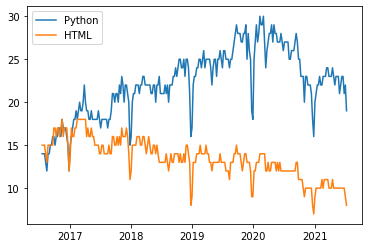

In [26]:
#Analayse data 
focus =['Python', 'HTML']

plt.plot(data[focus])
plt.legend(focus)

In [36]:
import pandas as pd

#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
data2 = country_data['Python'].nlargest(10)

#convert to dataframe
data2 = data2.to_frame()

data2

,Python
geoName,
China,48
Israel,35
St. Helena,28
South Korea,24
Singapore,23
Eritrea,20
Hong Kong,20
Iceland,20
Russia,20


In [34]:
type(data2)


pandas.core.series.Series

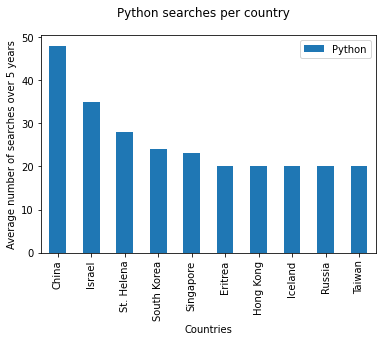

In [37]:
# PLOT BAR CHART WITH PANDAS
data2.plot(kind='bar')

#
plt.suptitle('Python searches per country')
plt.xlabel('Countries')
plt.ylabel('Average number of searches over 5 years')

plt.show()


In [44]:
#Plot a bar chart with multiple keywords 
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[40:60]  #Random ocuntries between 40-60 (20 countries)
data3


,Python,R,C++,Java,HTML
geoName,,,,,
Caribbean Netherlands,5,32,52,8,3
Cayman Islands,6,30,53,5,6
Central African Republic,0,28,50,22,0
Chad,3,26,53,15,3
Chile,11,23,48,11,7
China,48,6,11,29,6
Christmas Island,0,0,0,0,0
Cocos (Keeling) Islands,0,0,0,0,0
Colombia,7,24,45,14,10


<AxesSubplot:xlabel='geoName'>

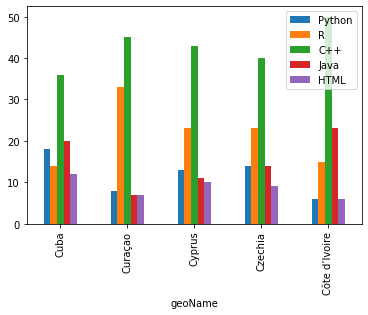

In [42]:
data3.plot(kind='bar')